# Лабораторная работа №1: Первичное исследование данных


## 1. Постановка задачи

### Описание датасета
Датасет содержит 15000 записей с характеристиками смартфонов, выпущенных между 2015 и 2025 годами, различных брендов, включая технические параметры (размер экрана, объем памяти, батарея), цену, год выпуска и дополнительные функции.

### Условный заказчик
Онлайн-агрегатор товаров, например «ЯндексМаркет» или «СберМегаМаркет»

### Возможные задачи ИАД
1. Сегментация смартфонов (бюджетные, флагманы, геймерские)
2. Поиск закономерности между размером характеристиками смартфона и его ценой
3. Анализ рыночных трендов по годам выпуска

## 2. Паспорт датасета

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv(r'C:\Desktop\Education\4 семестр\Интеллектуальный анализ данных\ЛР №1\data\smartphones.csv')  # Путь к вашему файлу
print(f'Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов')
df.head()

Размер датасета: 15000 строк, 25 столбцов


,id,brand_name,model,screen_size,price,release_year,operating_system,battery_capacity,ram,storage,...,body_material,chipset,gpu,dual_sim,network_support,bluetooth_version,wifi_version,usb_type,fast_charging,fingerprint_sensor
0,1,Oppo,Oppo F21,5.18,32452,2016.0,Android,5787,8,64,...,Plastic,Apple A16,Apple GPU,Yes,4G,5.0,WiFi 6E,Type-C,33,Yes
1,2,Apple,iPhone 13,6.27,63631,2024.0,iOS,4729,12,256,...,Metal,Snapdragon 8 Gen 2,Apple GPU,No,4G,5.1,WiFi 5,Type-C,120,No
2,3,Samsung,Galaxy Note 20,6.58,93218,2019.0,Android,3317,8,128,...,Glass,Dimensity 9000,Apple GPU,Yes,5G,5.2,WiFi 6,Type-C,33,No
3,4,Xiaomi,Redmi Note 12,5.66,14932,2022.0,Android,5073,12,128,...,Glass,Apple A16,Mali-G710,No,5G,5.2,WiFi 5,Type-C,67,Yes
4,5,Vivo,Vivo V27,5.34,-36420,2021.0,Android,5970,12,128,...,Glass,Apple A16,Apple GPU,No,4G,5.2,WiFi 6,Type-C,18,Yes


### Структура данных

In [2]:
# Информация о столбцах и типах
df.info()

# Статистика по числовым признакам
df.describe()

# # Преобразование бинарных признаков
# print("\nПреобразование бинарных признаков dual_sim и fingerprint_sensor:")
# binary_cols = ['dual_sim', 'fingerprint_sensor']
#
# for col in binary_cols:
#     if col in df.columns:
#         print(f"\nПризнак: {col}")
#         print(f"Уникальные значения до преобразования: {df[col].unique().tolist()}")
#         print(f"Количество пропусков: {df[col].isnull().sum()}")
#
#         # Преобразуем только существующие значения, пропуски остаются NaN
#         df[col] = df[col].replace({'Yes': 1, 'No': 0})
#
#         # Преобразуем в тип Int8 (он поддерживает NaN (Nullable Integer) и занимает меньше памяти)
#         df[col] = df[col].astype('Int8')
#
#         print(f"Уникальные значения после преобразования: {df[col].unique().tolist()}")
#         print(f"Тип данных после преобразования: {df[col].dtype}")

<class 'pandas.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  15000 non-null  int64  
 1   brand_name          14999 non-null  str    
 2   model               15000 non-null  str    
 3   screen_size         15000 non-null  float64
 4   price               15000 non-null  int64  
 5   release_year        14997 non-null  float64
 6   operating_system    14991 non-null  str    
 7   battery_capacity    15000 non-null  int64  
 8   ram                 15000 non-null  int64  
 9   storage             15000 non-null  int64  
 10  camera_mp           15000 non-null  int64  
 11  front_camera_mp     15000 non-null  int64  
 12  refresh_rate        15000 non-null  int64  
 13  weight              15000 non-null  int64  
 14  thickness           15000 non-null  float64
 15  body_material       14996 non-null  str    
 16  chipset        

,id,screen_size,price,release_year,battery_capacity,ram,storage,camera_mp,front_camera_mp,refresh_rate,weight,thickness,bluetooth_version,fast_charging
count,15000.000000,15000.000000,1.500000e+04,14997.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.757267,6.105217,4.373346e+04,2020.044742,4512.019667,7.482533,241.267200,57.800533,18.636267,103.260800,195.200000,8.003520,5.101187,59.930867
std,4329.888546,0.635395,3.397742e+04,3.175566,863.122796,2.948764,172.606622,34.410025,9.959848,31.564613,26.361794,0.866221,0.081937,39.215959
min,1.000000,5.000000,-3.642000e+04,2015.000000,3000.000000,4.000000,64.000000,12.000000,8.000000,60.000000,150.000000,6.500000,5.000000,18.000000
25%,3750.750000,5.560000,2.218375e+04,2017.000000,3780.000000,4.000000,128.000000,12.000000,8.000000,60.000000,172.000000,7.300000,5.000000,33.000000
50%,7499.500000,6.110000,3.795850e+04,2020.000000,4514.000000,8.000000,128.000000,48.000000,16.000000,90.000000,195.000000,8.000000,5.100000,67.000000
75%,11249.250000,6.650000,5.393850e+04,2023.000000,5259.000000,8.000000,512.000000,64.000000,32.000000,120.000000,218.000000,8.800000,5.200000,120.000000
max,15000.000000,7.200000,1.495630e+06,2025.000000,6000.000000,12.000000,512.000000,108.000000,32.000000,144.000000,240.000000,9.500000,5.200000,120.000000


## 3. Аудит качества данных

### 3.1. Пропуски

In [3]:
# Пропуски по столбцам
missing = pd.DataFrame({
    'Пропуски': df.isnull().sum(),
    'Доля (%)': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Пропуски', ascending=False)

if len(missing) > 0:
    print(missing[missing['Пропуски'] > 0])

# Топ-n признаков
n = 3
if len(missing) > 0:
    print(f"\nТоп-{n} признаков с наибольшим количеством пропусков:")
    print(missing.head(n))
else:
    print("\nПропусков в данных не обнаружено.")

# Наиболее проблемный признак — operating_system (больше всего пропусков).
# - Критичные пропуски (сильно влияют на анализ): operating_system, brand_name, chipset, fingerprint_sensor. Это ключевые характеристики для оценки смартфона, его возможностей и признаки для категоризации.
# - Не критические пропуски (минимальное влияние): body_material, release_year, wifi_version. Их отсутствие слабо искажает общую картину.


                    Пропуски  Доля (%)
operating_system           9      0.06
body_material              4      0.03
release_year               3      0.02
chipset                    1      0.01
brand_name                 1      0.01
fingerprint_sensor         1      0.01
wifi_version               1      0.01

Топ-3 признаков с наибольшим количеством пропусков:
                  Пропуски  Доля (%)
operating_system         9      0.06
body_material            4      0.03
release_year             3      0.02


### 3.2. Дубликаты

In [4]:
# Полные дубликаты строк
duplicates = df.duplicated().sum()
print(f'Полных дубликатов строк: {duplicates}')

# Дубликаты без учёта идентификатора (при условии его присутствия)
if 'id' in df.columns:
    duplicates_without_id = df.drop('id', axis=1).duplicated().sum()
    print(f'Дубликатов без учёта id: {duplicates_without_id}')

    id_duplicates = df['id'].duplicated().sum()
    print(f'Дубликатов id: {id_duplicates}')

Полных дубликатов строк: 2
Дубликатов без учёта id: 5
Дубликатов id: 3


## 3.3. Типические проблемы значений

In [5]:
# # Числовые столбцы
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
#
# results = []
#
# for col in numerical_cols:
#     min_value = df[col].min()
#     max_value = df[col].max()
#     mean_value = df[col].mean()
#     std_value = df[col].std()
#
#     suspicious_values = []
#
#     if col == "price":
#         if min_value < 0:
#             suspicious_values.append(min_value)
#         if max_value > 10000:
#             suspicious_values.append(max_value)
#
#     elif col == "id":
#         if min_value < 1:
#             suspicious_values.append(min_value)
#
#     elif col == "camera_mp" or col == "front_camera_mp":
#         if min_value < 0:
#             suspicious_values.append(min_value)
#         if max_value > 500:
#             suspicious_values.append(max_value)
#
#     elif col == "screen_size":
#         if min_value < 1:
#             suspicious_values.append(min_value)
#         if max_value > 10:
#             suspicious_values.append(max_value)
#
#     elif col == "release_year":
#         if min_value < 2015:
#             suspicious_values.append(min_value)
#         if max_value > 2025:
#             suspicious_values.append(max_value)
#
#     elif col == "battery_capacity":
#         if min_value < 100:
#             suspicious_values.append(min_value)
#         if max_value > 20000:
#             suspicious_values.append(max_value)
#
#     elif col == "ram":
#         if min_value < 1:
#             suspicious_values.append(min_value)
#         if max_value > 32:
#             suspicious_values.append(max_value)
#
#     elif col == "storage":
#         if min_value < 4:
#             suspicious_values.append(min_value)
#         if max_value > 10000:
#             suspicious_values.append(max_value)
#
#     elif col == "weight":
#         if min_value < 50:
#             suspicious_values.append(min_value)
#         if max_value > 500:
#             suspicious_values.append(max_value)
#
#     elif col == "thickness":
#         if min_value < 5:
#             suspicious_values.append(min_value)
#         if max_value > 20:
#             suspicious_values.append(max_value)
#
#     elif col == "bluetooth_version":
#         if min_value < 0:
#             suspicious_values.append(min_value)
#
#     elif col == "battery_capacity":
#         if min_value < 0:
#             suspicious_values.append(min_value)
#
#     elif col == "refresh_rate":
#         if min_value < 0:
#             suspicious_values.append(min_value)
#
#     results.append({
#         "Признак": col,
#         "Min": f"{min_value:.4f}",
#         "Max": f"{max_value:.4f}",
#         "Среднее": f"{mean_value:.4f}",
#         "Стандартное отклонение": f"{std_value:.4f}",
#         "Подозрительные значения": suspicious_values if suspicious_values else "-"
#     })
#
# results_df = pd.DataFrame(results)
# print("Статистика числовых признаков:")
# print(results_df.to_string(index=False))

### 3.4. Выбросы (один признак)

Выбросов по методу IQR: 1094

Границы IQR:
 Q1 (25%): 22183.75
 Q3 (75%): 53938.50
 IQR: 31754.75
 Нижняя граница: -25448.38
 Верхняя граница: 101570.62


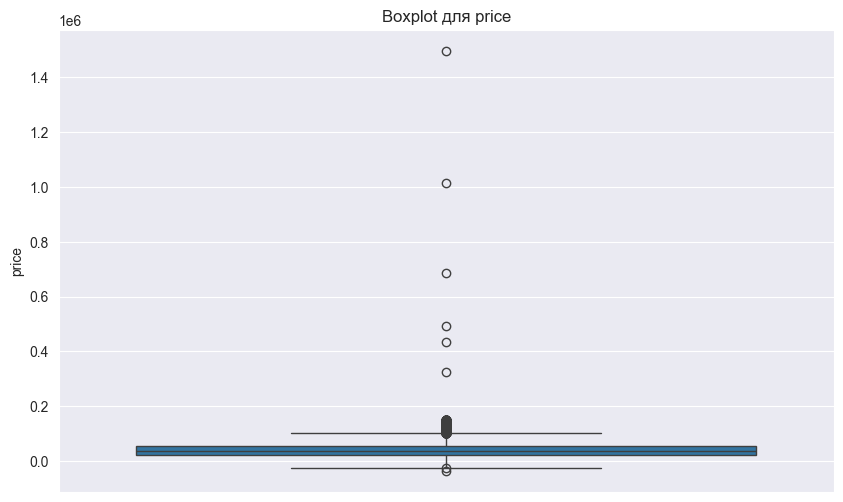

In [6]:
column = 'price'
Q1 = df[column].quantile(0.25) # 25% квартиль
Q3 = df[column].quantile(0.75) # 75% квартиль
IQR = Q3 - Q1 # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # Строки с выбросами
print(f'Выбросов по методу IQR: {len(outliers)}')

print(f"\nГраницы IQR:")
print(f" Q1 (25%): {Q1:.2f}")
print(f" Q3 (75%): {Q3:.2f}")
print(f" IQR: {IQR:.2f}")
print(f" Нижняя граница: {lower_bound:.2f}")
print(f" Верхняя граница: {upper_bound:.2f}")

# При анализе выбросов в ценах методом IQR:
# - Обнаружено 1094 потенциальных выброса (только в верхней границе)
# - Нижняя граница (-25 387) не имеет практического смысла для цен
# - Все выбросы - товары дороже 101 534

# Визуализация
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=column)
plt.title(f'Boxplot для {column}')
plt.show()


## 4. Разведочный анализ (EDA)

### 4.1. Распределение числового признака

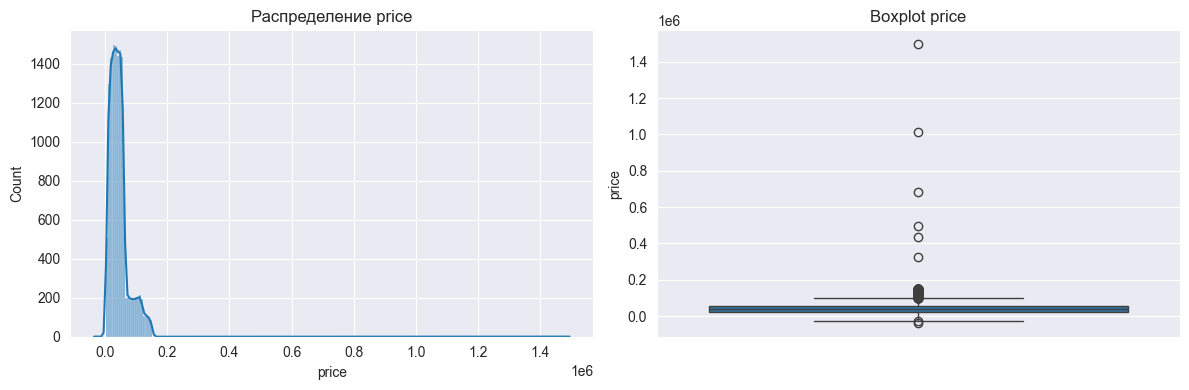

In [7]:
numeric_col = 'price'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_col], kde=True)
plt.title(f'Распределение {numeric_col}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[numeric_col])
plt.title(f'Boxplot {numeric_col}')
plt.tight_layout()
plt.show()

#

### 4.2. Анализ категориального признака

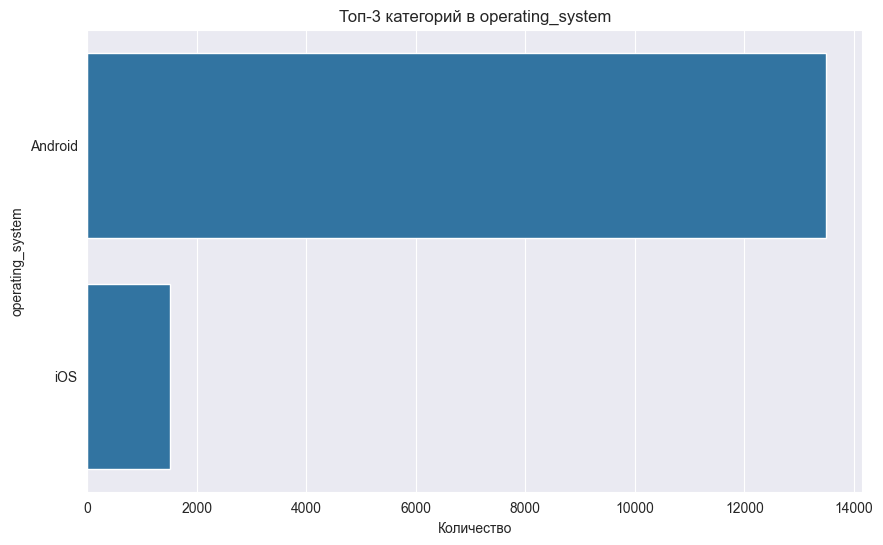

In [8]:
cat_col = 'operating_system'

n = len(df[cat_col].unique())

plt.figure(figsize=(10, 6))
top_categories = df[cat_col].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f'Топ-{n} категорий в {cat_col}')
plt.xlabel('Количество')
plt.show()

#

## 5. Выводы

Детали в файле `report/quality_report.md`